In [1]:
import time
import numpy as np
import scipy
from numpy import *
import matplotlib.pylab as plt
import operator
import pyscf
from pyscf import gto, scf, dft, tddft, data
import argparse

In [2]:
# parser = argparse.ArgumentParser(description='Davidson')

# parser.add_argument('-c', '--filename',       type=str, default='methanol.xyz', help='input filename')
# parser.add_argument('-m', '--method',         type=str, default='RKS', help='RHF RKS UHF UKS')
# parser.add_argument('-f', '--functional',     type=str, default='b3lyp', help='xc functional')
# parser.add_argument('-b', '--basis_set',      type=str, default='def2-SVP', help='basis sets')
# parser.add_argument('-i', '--initial_guess',  type=str, default='sTDA_A', help='initial_guess: diag_A or sTDA_A')
# parser.add_argument('-p', '--preconditioner', type=str, default='sTDA_A', help='preconditioner: diag_A or sTDA_A')
# parser.add_argument('-t', '--tolerance',      type=float, default='1e-5', help='residual norm convergence threshold')
# parser.add_argument('-n', '--nstates',        type=int, default='4', help='number of excited states')

# args = parser.parse_args()
# ################################################
# # read xyz file and delete its first two lines
# f = open(args.filename)
# coordinates = f.readlines()
# del coordinates[:2]
# ################################################

# print ('args.method =', args.method)
# ###########################################################################
# # build geometry in PySCF
# mol = gto.Mole()
# print (2)
# mol.build(atom = coordinates, basis = args.basis_set, symmetry = True)
# print (3)
# ###########################################################################

In [3]:
#np.set_printoptions (linewidth=300)

elements = ['H' , 'He', 'Li', 'Be', 'B' , 'C' , 'N' , 'O' , 'F' , 'Ne',
    'Na', 'Mg', 'Al', 'Si', 'P' , 'S' , 'Cl', 'Ar', 'K' , 'Ca',
    'Sc', 'Ti', 'V' , 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn',
    'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y' , 'Zr',
    'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn',
    'Sb', 'Te', 'I' , 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd',
    'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb',
    'Lu', 'Hf', 'Ta', 'W' , 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg',
    'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th',
    'Pa', 'U' , 'Np', 'Pu'] 
hardness = [
0.47259288,
0.92203391,
0.17452888,
0.25700733,
0.33949086,
0.42195412,
0.50438193,
0.58691863,
0.66931351,
0.75191607,
0.17964105,
0.22157276,
0.26348578,
0.30539645,
0.34734014,
0.38924725,
0.43115670,
0.47308269,
0.17105469,
0.20276244,
0.21007322,
0.21739647,
0.22471039,
0.23201501,
0.23933969,
0.24665638,
0.25398255,
0.26128863,
0.26859476,
0.27592565,
0.30762999,
0.33931580,
0.37235985,
0.40273549,
0.43445776,
0.46611708,
0.15585079,
0.18649324,
0.19356210,
0.20063311,
0.20770522,
0.21477254,
0.22184614,
0.22891872,
0.23598621,
0.24305612,
0.25013018,
0.25719937,
0.28784780,
0.31848673,
0.34912431,
0.37976593,
0.41040808,
0.44105777,
0.05019332,
0.06762570,
0.08504445,
0.10247736,
0.11991105,
0.13732772,
0.15476297,
0.17218265,
0.18961288,
0.20704760,
0.22446752,
0.24189645,
0.25932503,
0.27676094,
0.29418231,
0.31159587,
0.32902274,
0.34592298,
0.36388048,
0.38130586,
0.39877476,
0.41614298,
0.43364510,
0.45104014,
0.46848986,
0.48584550,
0.12526730,
0.14268677,
0.16011615,
0.17755889,
0.19497557,
0.21240778,
0.07263525,
0.09422158,
0.09920295,
0.10418621,
0.14235633,
0.16394294,
0.18551941,
0.22370139]
#in Hartree
HARDNESS = dict(zip(elements,hardness))

In [4]:
mol = gto.Mole()
mol.build(atom = '\
C         -4.89126        3.29770        0.00029;\
O         -3.49307        3.28429       -0.00328;\
H         -5.28213        2.58374        0.75736;\
H         -5.28213        3.05494       -1.01161;\
H         -5.23998        4.31540        0.27138;\
H         -3.22959        2.35981       -0.24953',\
basis = 'def2-SVP')


In [5]:
# mol = gto.Mole()
# mol.build(atom = '\
# C         -3.15617        2.59898        0.79547;\
# C         -1.79169        2.11570        0.42917;\
# O         -0.80893        2.56621        0.99508;\
# H         -1.66947        1.36193       -0.34183;\
# H         -3.35300        2.38970        1.86780;\
# H         -3.91803        2.07820        0.17854;\
# H         -3.22824        3.69190        0.61449',\
# basis = 'def2-SVP')

In [6]:
# mol = gto.Mole()
# mol.build(atom = 'O         -4.89126        3.29770        0.00029;\
# H         -3.49307        3.28429       -0.00328;\
# H         -5.28213        2.58374        0.75736', basis = 'def2-SVP', symmetry = True)

In [7]:
# mol = gto.Mole()
# mol.build(atom = '\
# C         -1.44673        2.80824       -0.07813;\
# O         -1.78998        3.80792       -0.69188;\
# N         -1.18291        1.66325       -0.74926;\
# N         -1.33221        2.85136        1.26946;\
# H         -1.53168        3.72026        1.78651;\
# H         -1.04365        2.01512        1.79805;\
# H         -1.26824        1.62382       -1.77554;\
# H         -0.89270        0.81388       -0.24298'\
# , basis = 'def2-SVP', symmetry = True)

In [8]:
# mf = dft.RKS(mol) 
# mf.conv_tol = 1e-12
# mf.grids.level = 9     # 0-9, big number for large mesh grids, default is 3
# mf.xc = 'b3lyp'
# mf.kernel()  #single point energy

In [9]:
# mf = dft.RKS(mol) 
# mf.conv_tol = 1e-12
# mf.grids.level = 9     # 0-9, big number for large mesh grids, default is 3
# mf.xc = 'cam-b3lyp'
# mf.kernel()  #single point energy

#ORCA: FINAL SINGLE POINT ENERGY = -115.576160742154
#Turbomole: total energy      =    -115.57615989622

In [10]:
mf = scf.RHF(mol) 
mf.conv_tol = 1e-13
mf.kernel()  #single point energy

converged SCF energy = -114.950987102225


-114.95098710222453

In [11]:
# CIS = pyscf.tdscf.rhf.CIS(mf)
# CIS.nstates = 5
# CIS.kernel()

In [12]:
# td = tddft.TDA(mf)
# start = time.time()
# td.kernel()    #compute first few excited states.
# end = time.time()
# print ('Pyscf time =', round(end-start,4))

In [13]:
#mf.analyze()
##MO energies

In [14]:
#mf.mulliken_pop_meta_lowdin_ao()
#population analysis
#mf.mulliken_pop()

In [15]:
#check whether a is symmetric
# def check_symmetric(a, tol=1e-12):
#     return np.all(np.abs(a-a.T) < tol)

In [16]:
def matrix_power (S,a):
    s,ket = np.linalg.eigh(S)
    # S = mf.get_ovlp() #.get_ovlp() is basis overlap matrix
    # S = np.dot(np.linalg.inv(c.T), np.linalg.inv(c))
    # #s are eigenvalues, must be all positive
    # #each column of ket is a eigenket
    s = s**a
    X = np.linalg.multi_dot([ket,np.diag(s),ket.T])
    #X == S^1/2
    return X

def orthonormalize (C):
    X = matrix_power(mf.get_ovlp(), 0.5)
    # X = S^1/2
    C = np.dot(X,C)
    return C
# C is orthonormalized coefficient matrix
# np.dot(C.T,C) is a identity matrix

def coefficient_matrix ():
    C = mf.mo_coeff
    # mf.mo_coeff is the coefficient matrix
    C = orthonormalize (C)
    return C
# rthogonalized MO coefficients 
C = coefficient_matrix ()

In [17]:
total_begin = time.time()

In [18]:
Natm = mol.natm
MOe = mf.mo_energy  
#an array of MO energies, in Hartree

occupied = len(np.where(mf.mo_occ > 0)[0])
#mf.mo_occ is an array of occupance [2,2,2,2,2,0,0,0,0.....]
virtual = len(np.where(mf.mo_occ == 0)[0])

AO = [int(i.split(' ',1)[0]) for i in mol.ao_labels()] 
# .split(' ',1) is to split each element by space, split once.
# mol.ao_labels() it is Labels of AO basis functions, AO is a list of corresponding atom_id
# AO == [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]
N_bf = len(AO)

a_x = 0.38
beta1= 1.86
beta2=0
alpha1= 0.9
alpha2=0
beta = beta1 + beta2 * a_x
alpha = alpha1 + alpha2 * a_x

In [19]:
#build gammaJ and gammaK matrix

#function to return chemical hardness from dictionary HARDNESS
def Hardness (atom_id):
    atom = mol.atom_pure_symbol(atom_id) 
    return HARDNESS[atom]
# mol.atom_pure_symbol(atom_id) returns pure element symbol, no special characters
def eta (atom_A_id, atom_B_id):
    eta = (Hardness(atom_A_id) + Hardness(atom_B_id))/2
    return eta
R = pyscf.gto.mole.inter_distance(mol, coords=None) 
#Inter-particle distance array
# unit == ’Bohr’, Its value is 5.29177210903(80)×10^(−11) m

In [20]:
start = time.time()
GammaJ = np.zeros([Natm, Natm])
for i in range (0, Natm):
    for j in range (0, Natm):
        GammaJ[i,j] = (R[i, j]**beta + (a_x * eta(i, j))**(-beta))**(-1/beta)

GammaK = np.zeros([Natm, Natm])
for i in range (0, Natm):
    for j in range (0, Natm):
        GammaK[i,j] = (R[i, j]**alpha + eta(i, j)**(-alpha)) **(-1/alpha)

In [21]:
Natm = mol.natm 
def generateQ ():
    q = np.zeros([Natm, N_bf, N_bf])
    #N_bf is number Atomic orbitals, occupied+virtual, q is same size with C
    C = coefficient_matrix ()
    for atom_id in range (0, Natm):
        for i in range (0, N_bf):
            for p in range (0, N_bf):
                for mu in range (0, N_bf):
                    if AO[mu] == atom_id:
                        #collect all basis functions centered on atom_id
                        # the last loop is to sum up all C_mui*C_mup, calculate element q[i,p]
                        q[atom_id,i,p] += C[mu,i]*C[mu,p]
                        #q[i,p] += 2*C[i,mu]*C[p,mu]
    return q

In [22]:
q_tensors   = generateQ    ()
q_tensor_ij = q_tensors [:, :occupied,:occupied]
q_tensor_ab = q_tensors [:, occupied:,occupied:]
q_tensor_ia = q_tensors [:, :occupied,occupied:]

Q_K = np.einsum('Bjb, AB -> Ajb', q_tensor_ia, GammaK)
Q_J = np.einsum('Bab, AB -> Aab', q_tensor_ab, GammaJ)

end = time.time()

Q_gamma_tensors_building_time = end - start
print ('Q_tensorQ_gamma_tensors_building_time =', Q_gamma_tensors_building_time)

Q_tensorQ_gamma_tensors_building_time = 0.17055416107177734


In [23]:
# iajb_v = np.einsum('Aia, Bjb, AB, jbm -> iam', q_tensor_ia, q_tensor_ia, GammaK, V)

# ijab_v = np.einsum('Aij, Bab, AB, jbm -> iam', q_tensor_ij, q_tensor_ab, GammaJ, V)
# ijab_v = np.einsum('Aij, Aab, jbm -> iam', q_tensor_ij, Q_J,  V)

def iajb_fly (V):
    V = V.reshape(occupied, virtual, -1)
    Q_K_V = np.einsum('Ajb, jbm -> Am', Q_K, V)
    iajb_V = np.einsum('Aia, Am -> iam', q_tensor_ia, Q_K_V).reshape(occupied*virtual, -1)
#     print('iajb done')
    return iajb_V

def ijab_fly (V):
    V = V.reshape(occupied, virtual, -1)
#     ijab_v = np.einsum('Aij, Aab, jbm -> iam', q_tensor_ij, Q_J,  V)

    Aij_V = np.einsum('Aij, jbm -> Aibm', q_tensor_ij, V)
    ijab_V = np.einsum('Aab, Aibm -> iam', Q_J, Aij_V).reshape(occupied*virtual, -1)

#     print ('ijab done')
#     Aab_V = np.einsum('Aab, jbm -> jAam', Q_J, V)
#     ijab_V = np.einsum('Aij, jAam -> iam', q_tensor_ij, Aab_V).reshape(occupied*virtual, -1)
    return ijab_V

delta_diag_A = np.zeros((occupied, virtual))
for i in range (0, occupied):
    for a in range (0, virtual):
        delta_diag_A[i,a] = (MOe[occupied+a] - MOe[i])

# delta_ij = np.eye(occupied,occupied)
# delta_ab = np.eye(virtual,virtual)
def delta_fly (V):
    V = V.reshape(occupied, virtual, -1)
#     print ('Shape of V = ', np.shape(V))
    #delta_v = np.einsum('ij,ab,ia,jb -> ia',delta_ij,delta_ab,delta_diag_A, v)
    delta_v = np.einsum('ia,iam -> iam', delta_diag_A, V).reshape(occupied*virtual, -1)
    return delta_v

def sTDA_fly (V):
    V = V.reshape(occupied*virtual,-1)
    # -1 means shape of first dimension is not asigned, but can be inferred with the rest dimension
    # this feature can deal with multiple vectors
    sTDA_V =  delta_fly (V) + 2*iajb_fly (V) - ijab_fly (V) 
#     sTDA_V = sTDA_V.reshape(occupied*virtual, -1)
#     print (np.shape(sTDA_v))
    return sTDA_V

Q_tensorQ_gamma_tensors_building_time = 0.17055416107177734
sTDA_A building time =  0.03237509727478027
total building sTDA A time = 0.2544381618499756
[12.2388045  13.59944497 13.79151538 15.04073066]


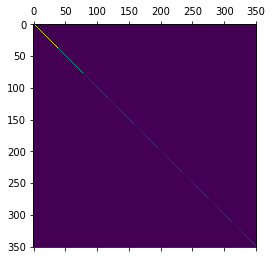

In [24]:
n = occupied * virtual
I = np.eye(n)

start = time.time()
sTDA_A = sTDA_fly (I)
end = time.time()  

sTDA_A_building_time = end - start

print ('Q_tensorQ_gamma_tensors_building_time =', Q_gamma_tensors_building_time)

print ('sTDA_A building time = ', sTDA_A_building_time)

total_end = time.time()  

total_build_time = total_end - total_begin

print ('total building sTDA A time =', total_build_time)

s,k = np.linalg.eigh(sTDA_A)
print (s[:4]*27.21138624598853)


# ijab contract ij first 
# Q_tensorQ_gamma_tensors_building_time = 0.14207124710083008
# sTDA_A building time =  0.03429985046386719
# sTDA_A building time =  0.031857967376708984
# sTDA_A building time =  0.03574705123901367
# sTDA_A building time =  0.03632998466491699
# sTDA_A building time =  0.03199195861816406
# total building sTDA A time = 0.21783995628356934
# [12.2388045  13.59944497 13.79151538 15.04073066]


# ijab contract ab first
# Q_tensorQ_gamma_tensors_building_time = 0.1520397663116455
# sTDA_A building time =  0.03174281120300293
# sTDA_A building time =  0.03430318832397461
# sTDA_A building time =  0.029811859130859375
# sTDA_A building time =  0.03499102592468262
# sTDA_A building time =  0.033949851989746094
# sTDA_A building time =  0.035989999771118164
# sTDA_A building time =  0.03299880027770996
# total building sTDA A time = 0.2343301773071289
# [12.2388045  13.59944497 13.79151538 15.04073066]



plt.matshow(sTDA_A)
plt.show()

In [25]:
# # suppose a has N columns
# #a[:, :n] means the first n columns
# #a[:, n:] means "except" the first n columns

# #a[:, -n:] means the last n columns
# #a[:, :-n] means the firts (N-n) columns, or "except" the last n columns

# #a[:, n:m] measn from index(n) column to index(m-1) columns

In [26]:
for i in range (1,2):
    print (i)

1


In [27]:
# def orthonormalize (v1, v2):
# #     v1 = v1/np.linalg.norm(v1)
#     v2 = v2 - (np.dot(v1, v2) / np.dot(v1, v1)) * v1
# #     v2 = v2 - np.dot(v1, v2) * v1
#     v2 = v2/np.linalg.norm(v2)
#     return v2

In [28]:
# Q = np.random.rand(10,5)
# print (Q)
# #built-in function of np approaching, V is the a orthonnormalized matrix
# V,R = np.linalg.qr(Q)
# print (V)
# print (np.dot(V.T, V))

In [29]:
# Q = Gram_Schdmit (Q)
# print (Q)
# print (np.dot(Q.T, Q))

In [71]:
# def Gram_Schdmit_append (A, B):
#     # A_I*P, B_I*Q
#     # suppose A is already orthonormalized
#     # append B to A, and orthonormalize matrix B against A, 
    
#     A_vectors = np.shape(A)[1]
#     B_vectors = np.shape(B)[1]
    
#     C = np.append (A, B, axis=1)
    
#     for j in range (0, B_vectors):
#         bvec = B[:,j]
#         bvec = Gram_Schdmit_bvec (C[:, :A_vectors + j], B[:,j])
#         C[:, A_vectors + j] = bvec/np.linalg.norm(bvec)
#     return C

In [140]:
# def Gram_Schdmit_against (A, B):
#     # suppose A is already orthonormalized
#     # orthonormalize vectors in B against A, as well as B it self
  
#     A_vectors = np.shape(A)[1]
#     B_vectors = np.shape(B)[1]

#     for j in range (0, B_vectors):
#         bvec = B[:,j] 
#         bvec = Gram_Schdmit_bvec (A, bvec)
#         if np.linalg.norm(bvec) < 1e-7:
#             index.append(j)
#         else:
#             B[:,j] = bvec/np.linalg.norm(bvec)
# #     print (type(index)) #list
# #     print (index)

#     B = np.delete(B, index, axis=1)
        
#     B = Gram_Schdmit (B)
# #     print (np.shape(B))
#     return B

[1, 3, 54, 5]


In [142]:
def check_orthonormal (A):
    n = np.shape(A)[1]
    B = np.dot (A.T, A)
    c = np.linalg.norm(B - np.eye(n))
    return c

In [259]:
a = np.random.random ((600,120))
A = Gram_Schdmit (a)

b = np.random.random ((600,140))
x = np.random.random ((600,140))
z = np.random.random ((600,14))

# dab = np.append (a,b, axis=1)
# dabx = np.append (dab, x, axis=1)
# dabxz = np.append (dabx, z, axis=1)

# cab = Gram_Schdmit_append (A, b)
# cabx = Gram_Schdmit_append (cab, x)
# cabxz = Gram_Schdmit_append (cabx, z)

In [260]:
def Gram_Schdmit_bvec (A, bvec):
    # suppose A is orthonormalized
    projections_coeff = np.dot(A.T, bvec)
    bvec = bvec - np.dot(A, projections_coeff)   
    return bvec

In [261]:
# def Gram_Schdmit (A):
#     # A matrix has J columns, orthonormalize each columns
#     N_vectors = np.shape(A)[1]
    
#     A = A/np.linalg.norm(A, axis=0, keepdims = True)
    
# #     for p in range (0, J - 1):
# #         for q in range (p + 1, J):
# #             A[:, q] = orthonormalize(A[:, p], A[:, q])
    
#     for j in range (1, N_vectors):
#         bvec = Gram_Schdmit_bvec (A[:, :j], A[:, j])
#         A[:, j] = bvec/np.linalg.norm(bvec)
#     return A

In [310]:
def Gram_Schdmit_fill_holder (V, W, count, vecs):
    # V, W are holders 
    # count is the amount of vectors that already sit in the holder
    nvec = np.shape(vecs)[1]
    # amount of new vectors to fill in
    
    i = count
    for j in range (0, nvec):
        vec = vecs[:, j]
        vec = Gram_Schdmit_bvec(V[:, :i], vec)
#         print ('shape of V[:, i:]', np.shape(V[:, :i]))
        norm = np.linalg.norm(vec)
#         print ('norm =', norm)
        if  norm > 1e-14:
            vec = vec/norm
            V[:, i] = vec
#             print (np.shape(vec))

            i += 1
#             print ('count =', i)
    W[:, count:i] = sTDA_fly(V[:, count:i])

    count = i

        
#     print ('norms of V =', np.linalg.norm(V, axis=0, keepdims = True))
#     print ('norms of W =', np.linalg.norm(W, axis=0, keepdims = True))
    return V, W, count

In [311]:
a = np.zeros ((351,50))
b = np.zeros ((351,50))
x = np.random.random ((351, 10))
# x = Gram_Schdmit(x)

In [312]:
a, b, c = Gram_Schdmit_fill_holder (a, b, 0, x)
print ('final count =', c)
print ('check_orthonormal a = ', check_orthonormal(a[:, :c]))
# print (np.linalg.norm(a[:, :c] - x))
print ('norms of a =', np.linalg.norm(a, axis=0, keepdims = True))
print (np.dot (a[:,0],a[:,6]))

final count = 10
check_orthonormal a =  1.508412258766565e-15
norms of a = [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
-1.5699247457590104e-16


In [319]:
###########################################################################################
def preconditioner_sTDA (B, eigen_lambda, Y=0): 
    Lambda = np.diag(eigen_lambda)
    # (sTDA_A - eigen_lambda*I)^-1 B = X 
    # AX - X\lambda = B

    # columns of B are the vectors to be preconditioned, 
    N_rows = np.shape(B)[0]
    
    B = B.reshape(N_rows, -1)

    N_vectors = np.shape(B)[1]
    #number of vectors to be preconditioned
    
    bnorm = np.linalg.norm(B, axis=0, keepdims = True)
    #norm of each vectors in B, shape (1,-1)
    B = B/bnorm
#     print ('shape of B=', np.shape(B))
    start = time.time()
    tol = 1e-5     # Convergence tolerance
    max = 40    # Maximum number of iterations  
    
    V = np.zeros((N_rows, N_rows))
    W = np.zeros((N_rows, N_rows))
    count = 0
#     print ('norms of V =', np.linalg.norm(V, axis=0, keepdims = True))
    # now V and W are empty holders, 0 vectors
    # W = sTDA_fly(V)
    # count is the amount of vectors that already sit in the holder
    # at the end of each iteration, V and W will be filled/updated with new guess vectors
    
    ###########################################
    #initial guess: (diag(A) - \lambda)^-1 B.
    diag = delta_diag_A.flatten()
#     # delta_diag_A.flatten() is (\spsilon_a-\spsilon_i)

    D = np.zeros((N_rows, N_vectors))
    for i in range (0, N_vectors):
        D[:,i] = diag - eigen_lambda[i]

    #D is preconditioner for each state 
#     print ('shape of D =', np.shape(D))
    
    init = B/D
#     print ('check init0', check_orthonormal(init))
   
#     print ('norm of init = ', np.linalg.norm (init))
#     print ('check init1', check_orthonormal(init))
#     print ('shape of init =', np.shape(init))
#     print ('check V0', check_orthonormal(V))
    ###########################################

    V, W, count = Gram_Schdmit_fill_holder (V, W, count, init)
#     print ('norms of V =', np.linalg.norm(V, axis=0, keepdims = True))
#     print ('check V0', check_orthonormal(V[:,:count]))
#     print ('norm of first vec',np.linalg.norm(V[:,:count]))
#     print ('count = ',count)
    # initial guess settled 

    ####################################################################################
    # Begin iterations
    for i in range (0, max):
#         print ('Iteration =', i)
        sub_B = np.dot(V[:,:count].T, B) 
        sub_A = np.dot(V[:,:count].T, W[:,:count])    
        #project sTDA_A matrix and vector B into subspace 
        m = np.shape(sub_A)[0]
#         print ('subaspace size = ', np.shape(sub_A))
#         print ('check V1', check_orthonormal(V[:,:count]))
        #m is always the size of subspace
        print ('Size of subspace =', m)
        # size of subspace
        sub_guess = scipy.linalg.solve_sylvester(sub_A, - Lambda, sub_B)   
        #scipy.linalg.solve_sylvester(A,B,Q) # solve equation AX + XB = Q
#         print ('shape of sub_guess = ', np.shape(sub_guess))
#         print ('shape of V = ', np.shape(V))
#         sub_guess = Gram_Schdmit(sub_guess)
        full_guess = np.dot(V[:,:count], sub_guess)
#         print ('shape of full_guess = ', np.shape(full_guess))
#         print ('shape of sTDA_fly(full_guess) = ', np.shape(sTDA_fly(full_guess)))
#         print ('shape of eigen_lambda * full_guess = ', np.shape(eigen_lambda * full_guess))       
        
        residual = np.dot(W[:,:count], sub_guess) - full_guess*eigen_lambda - B  
        
#         print ('shape of residual rrrrrrr= ', np.shape(residual))   
        Norms_of_r = np.linalg.norm (residual, axis=0, keepdims = True)
        print ('Norms_of_r =', Norms_of_r)

#         print ('shape of Norm =', np.shape(Norms_of_r))
        
        max_norm = np.max(Norms_of_r)
        
#         print ('max_norm = ', max_norm)
        if max_norm < tol:
            break
        index = [i for i in range(np.shape(Norms_of_r)[1]) if Norms_of_r[0,i] > tol]
        # index for not converged residuals
#         print ('index =',index)

#         print ('shape of residaul =', np.shape(residual))
        
        # preconditioning step
        # only generate new guess from unconverged residuals
        new_guess = residual[:,index]/D[:,index]
#         print ('shape of new_guess =', np.shape(new_guess))
        
#         new_guess = Gram_Schdmit (Gram_Schdmit)
        
#         print ('shape of new_guess0 =', np.shape(new_guess))
#         print ('check new_guess', check_orthonormal(new_guess))

        
#         print ('count1 = ',count)
        V, W, count = Gram_Schdmit_fill_holder (V, W, count, new_guess)
        print ('check orthonormal of V', check_orthonormal(V[:,:count]))
#         print ('count2 = ',count)
#         if i%10 == 0 and i!= 0:
#             V[:,:count] = Gram_Schdmit(V[:,:count])
    
#         W = np.append(W, sTDA_fly(V[:, m:]), axis=1)
#         W = sTDA_fly(V)
        # add new guess to the guess space
    ####################################################################################      

    #########################################################################################
    end = time.time()
    
    print ( 'n_residuals: ', N_vectors, '   Time: ', round(end-start,4))
    if i == max -1:
        print ('~~~~~~~~Failed~~~~~~~~~')
    else:
        print ('Converged!')
    print ('Iteration_steps =', i)
    
    
    
    
    print ('Size of subspace =', m)
    return (full_guess*bnorm)
#     return (full_guess)
###########################################################################################

In [320]:
for n_residuals in range (1,25):
    
    B = np.random.random ((occupied*virtual, n_residuals))

    Y = None

    eigen_lambda = np.arange(10, 10+n_residuals)

#     print ('n_residuals = ',n_residuals)

    preconditioned_B =  preconditioner_sTDA (B, eigen_lambda, Y)
    # print ('Norm of preconditioned_B', np.linalg.norm(preconditioned_B))
    true_answer = scipy.linalg.solve_sylvester(sTDA_A, -np.diag(eigen_lambda), B)

    # print ('Norm of true_answer     ',np.linalg.norm(true_answer))
    # print (np.shape(true_answer))

#     print ('Norm of difference: ', np.linalg.norm(true_answer - preconditioned_B))
    # print (np.shape(true_answer - preconditioned_B))

    preconditioned_B = preconditioned_B/np.linalg.norm(preconditioned_B)
    true_answer = true_answer/np.linalg.norm(true_answer)
    print ('Norm of normalized difference: ', np.linalg.norm(true_answer - preconditioned_B))
    print ('__________________________________')
# residual size: 351
# convergence threshold = 1e-5


# n_residuals:  1    Time:  0.0057 s
# n_residuals:  2    Time:  0.0067 s
# n_residuals:  3    Time:  0.0213 s
# n_residuals:  4    Time:  0.0311 s
# n_residuals:  5    Time:  0.0327 s
# n_residuals:  6    Time:  0.0307 s
# n_residuals:  7    Time:  0.1516 s
# n_residuals:  8    Time:  0.0335 s
# n_residuals:  9    Time:  0.2242 s
# n_residuals:  10    Time:  0.2276 s
# n_residuals:  11    Time:  0.1852 s
# n_residuals:  12    Time:  0.3459 s
# n_residuals:  13    Time:  0.3818 s
# n_residuals:  14    Time:  0.0549 s
# n_residuals:  15    Time:  0.4912 s
# n_residuals:  16    Time:  0.693 s
# n_residuals:  17    Time:  0.0648 s
# n_residuals:  18    Time:  0.0651 s
# n_residuals:  19    Time:  0.0757 s
# n_residuals:  20    Time:  0.0752 s
# n_residuals:  21    Time:  0.0794 s
# n_residuals:  22    Time:  0.102 s
# n_residuals:  23    Time:  0.0908 s
# n_residuals:  24    Time:  0.0968 s


# n_residuals:  1    Time:  0.003
# Converged!
# Iteration_steps = 3
# check orthonormal of V 9.369594630673133e-16
# Size of subspace = 4
# Norm of normalized difference:  7.083267229063208e-06
# __________________________________
# n_residuals:  2    Time:  0.0056
# Converged!
# Iteration_steps = 5
# check orthonormal of V 1.4950934230057933e-14
# Size of subspace = 10
# Norm of normalized difference:  3.706145624277972e-06
# __________________________________
# n_residuals:  3    Time:  0.0133
# Converged!
# Iteration_steps = 17
# check orthonormal of V 2.8416316650394393e-10
# Size of subspace = 30
# Norm of normalized difference:  1.350642511331372e-07
# __________________________________
# n_residuals:  4    Time:  0.0184
# Converged!
# Iteration_steps = 16
# check orthonormal of V 3.4191606289199777e-09
# Size of subspace = 45
# Norm of normalized difference:  1.5860177010738874e-08
# __________________________________
# n_residuals:  5    Time:  0.0223
# Converged!
# Iteration_steps = 15
# check orthonormal of V 1.0153755211627869e-08
# Size of subspace = 54
# Norm of normalized difference:  1.5529649539049188e-08
# __________________________________
# n_residuals:  6    Time:  0.0302
# Converged!
# Iteration_steps = 14
# check orthonormal of V 3.0153913086176707e-05
# Size of subspace = 62
# Norm of normalized difference:  5.934963016167698e-07
# __________________________________
# n_residuals:  7    Time:  0.0257
# Converged!
# Iteration_steps = 14
# check orthonormal of V 1.0329435968146342e-06
# Size of subspace = 64
# Norm of normalized difference:  3.536950174854067e-08
# __________________________________
# n_residuals:  8    Time:  0.027
# Converged!
# Iteration_steps = 13
# check orthonormal of V 1.814203636592165e-08
# Size of subspace = 66
# Norm of normalized difference:  5.803217337144217e-08
# __________________________________
# n_residuals:  9    Time:  0.2509
# XXXXXXFailedXXXXXXXX
# Iteration_steps = 39
# check orthonormal of V 111.356884400047
# Size of subspace = 182
# Norm of normalized difference:  0.004846142288207488
# __________________________________
# n_residuals:  10    Time:  0.3427
# XXXXXXFailedXXXXXXXX
# Iteration_steps = 39
# check orthonormal of V 146.29698829079035
# Size of subspace = 217
# Norm of normalized difference:  0.9815479042348793
# __________________________________
# n_residuals:  11    Time:  0.2189
# XXXXXXFailedXXXXXXXX
# Iteration_steps = 39
# check orthonormal of V 79.20598118254699
# Size of subspace = 162
# Norm of normalized difference:  4.807993490469451e-05
# __________________________________


Size of subspace = 1
Norms_of_r = [[0.08542564]]
check orthonormal of V 1.3322676295501878e-15
Size of subspace = 2
Norms_of_r = [[0.00144778]]
check orthonormal of V 1.4635638982113093e-15
Size of subspace = 3
Norms_of_r = [[7.89645767e-05]]
check orthonormal of V 1.483395633781229e-15
Size of subspace = 4
Norms_of_r = [[8.4031152e-06]]
n_residuals:  1    Time:  0.0081
Converged!
Iteration_steps = 3
Size of subspace = 4
Norm of normalized difference:  8.183524599645292e-06
__________________________________
Size of subspace = 2
Norms_of_r = [[0.05574652 3.47913281]]
check orthonormal of V 2.1622435697738383e-15
Size of subspace = 4
Norms_of_r = [[0.00512319 0.0218923 ]]
check orthonormal of V 2.077701184197089e-14
Size of subspace = 6
Norms_of_r = [[5.76782152e-05 1.93497397e-03]]
check orthonormal of V 2.5883249918420162e-14
Size of subspace = 8
Norms_of_r = [[3.33469919e-06 2.18255698e-04]]
check orthonormal of V 2.768403349370206e-14
Size of subspace = 9
Norms_of_r = [[3.22892704e-

check orthonormal of V 4.003596667761486
Size of subspace = 63
Norms_of_r = [[5.73482677e-08 2.84654645e-07 7.53570756e-05 1.33244961e-05
  2.50702431e-07]]
check orthonormal of V 5.96783108878086
Size of subspace = 65
Norms_of_r = [[6.38865951e-08 2.87814721e-07 8.27757009e-05 1.44909969e-05
  2.53380727e-07]]
check orthonormal of V 7.948090876550407
Size of subspace = 67
Norms_of_r = [[6.85839008e-08 2.90370878e-07 8.77724037e-05 1.52621371e-05
  2.55513517e-07]]
check orthonormal of V 9.935537893199722
Size of subspace = 69
Norms_of_r = [[7.20307358e-08 2.92359849e-07 9.13006975e-05 1.58006470e-05
  2.57142473e-07]]
check orthonormal of V 11.926848165138608
Size of subspace = 71
Norms_of_r = [[7.46431622e-08 2.93921795e-07 9.39068655e-05 1.61954646e-05
  2.58401574e-07]]
check orthonormal of V 13.920476587364012
Size of subspace = 73
Norms_of_r = [[7.66829033e-08 2.95170793e-07 9.59043253e-05 1.64964463e-05
  2.59395492e-07]]
check orthonormal of V 15.915605338068472
Size of subspac

Size of subspace = 56
Norms_of_r = [[7.73415737e-07 3.99545261e-06 5.82846758e+00 1.90022183e+00
  4.39092402e-03 1.83822957e-06 3.61934612e-08 1.02224142e-07]]
check orthonormal of V 4.78061272718588e-08
Size of subspace = 59
Norms_of_r = [[6.73493680e-07 3.72131722e-06 3.62594063e+01 1.30521874e+00
  1.84816644e-04 2.40107309e-06 5.52863084e-08 1.06600494e-07]]
check orthonormal of V 1.4010356869882165e-07
Size of subspace = 62
Norms_of_r = [[1.98298482e-06 3.12718781e-06 2.05465665e+01 4.92091706e-02
  7.63941555e-06 7.94256245e-07 3.45731348e-08 4.06334251e-07]]
check orthonormal of V 2.5423087925046287e-06
Size of subspace = 64
Norms_of_r = [[2.00758632e-06 3.09698767e-06 4.81846049e-01 9.96496010e-04
  1.83557992e-06 6.09172914e-07 2.46246254e-08 8.48213696e-08]]
check orthonormal of V 5.3088049479706465e-06
Size of subspace = 66
Norms_of_r = [[1.67589795e-07 7.44107194e-07 7.93762315e-03 1.54250689e-05
  1.27720320e-06 5.23882659e-07 3.26629603e-08 2.60169984e-07]]
check orthono

Norm of normalized difference:  0.012183429761050031
__________________________________
Size of subspace = 10
Norms_of_r = [[0.07540352 0.57214655 2.22968848 6.96990643 2.07660968 2.14706106
  0.04562093 0.03643071 0.09566204 0.63984093]]
check orthonormal of V 2.5924157856646576e-13
Size of subspace = 20
Norms_of_r = [[7.79964230e-03 3.27309130e-01 2.51313183e+01 1.61447341e+00
  7.23192034e-01 1.20675989e-01 2.93859581e-02 6.15640096e-03
  9.55431544e-03 9.24547670e-02]]
check orthonormal of V 1.374215641126618e-11
Size of subspace = 30
Norms_of_r = [[2.40276118e-03 1.64965383e-02 2.26813440e+00 2.28870173e+00
  1.46166004e-01 1.25303520e-02 3.86288751e-04 7.79059557e-05
  1.42173154e-04 1.54866672e-03]]
check orthonormal of V 7.420231313290909e-11
Size of subspace = 40
Norms_of_r = [[4.63919645e-04 5.02969291e-03 1.39340896e+00 1.08049658e+00
  1.23757011e-01 2.34804453e-03 4.97144560e-05 4.85306949e-06
  1.27054943e-05 5.87890947e-04]]
check orthonormal of V 2.2668493027826795e-09


check orthonormal of V 1.2887732799364991e-13
Size of subspace = 33
Norms_of_r = [[6.03121200e-04 5.34369471e-03 6.59695730e+01 2.14344647e+00
  8.30356920e-01 2.95883927e-01 3.65961971e-03 1.11624142e-04
  1.58920872e-04 1.70772599e-04 2.69968793e-03]]
check orthonormal of V 8.10465604139241e-12
Size of subspace = 44
Norms_of_r = [[1.26035672e-04 9.44863085e-04 5.64909007e+00 1.57951647e+00
  2.11984787e-01 5.41330576e-02 2.22533973e-05 1.62235684e-06
  4.62071434e-05 1.31681473e-04 3.24618910e-04]]
check orthonormal of V 1.795486334071923e-09
Size of subspace = 54
Norms_of_r = [[9.20423966e-06 4.93271713e-04 4.42867305e+00 1.49684997e+00
  3.06323370e-01 1.43952797e-03 8.21183890e-07 4.13504850e-07
  1.47814911e-06 1.76415908e-05 3.86178525e-05]]
check orthonormal of V 1.8460106819944624e-08
Size of subspace = 61
Norms_of_r = [[5.42197811e-05 5.07523339e-05 3.34767799e+00 1.08323618e+00
  5.66128056e-02 1.45872074e-04 5.66422572e-07 1.40328912e-06
  3.23095841e-06 7.37703965e-07 2.33

check orthonormal of V 1.3653357796829886e-11
Size of subspace = 57
Norms_of_r = [[2.50173751e-05 2.79083457e-04 2.78186876e+00 2.71288740e+00
  5.29730345e-02 7.72888230e-04 1.00940837e-05 1.11673182e-06
  5.27925254e-06 6.31091457e-06 2.97799421e-04 8.51125774e-01]]
check orthonormal of V 3.620127451756669e-10
Size of subspace = 66
Norms_of_r = [[2.47862743e-06 3.80393335e-05 8.14216215e+00 4.87480907e+00
  7.70277510e-02 3.18575592e-03 4.35131383e-07 3.35271748e-07
  5.46292628e-07 2.69677705e-06 3.48021862e-06 3.82615406e-01]]
check orthonormal of V 2.633658899825556e-08
Size of subspace = 72
Norms_of_r = [[1.24232571e-06 2.37116164e-04 9.61929992e+00 4.78320998e+00
  4.43810158e-03 1.27675304e-05 1.56235913e-07 3.00098350e-07
  5.31271994e-07 6.40267976e-06 2.39003034e-05 2.36143280e-01]]
check orthonormal of V 2.260751116432178e-06
Size of subspace = 79
Norms_of_r = [[9.54978088e-07 7.21362565e-06 1.03209548e+00 4.13926735e-01
  2.90080316e-04 1.69926929e-05 2.60116859e-07 2.0778

Norms_of_r = [[1.31728099e-06 7.51330977e-06 1.83205740e+00 7.61228373e-02
  4.42739557e-05 5.72071100e-06 9.74347948e-08 7.50696941e-04
  5.58130449e-06 3.80625141e-06 9.67419356e-06 8.18632675e-02]]
check orthonormal of V 132.56164367447505
Size of subspace = 224
Norms_of_r = [[1.31749383e-06 7.51259375e-06 1.83242763e+00 7.61322917e-02
  4.42720477e-05 5.72045755e-06 9.74205738e-08 7.37969521e-04
  5.58277065e-06 3.80642939e-06 9.67323447e-06 8.18502436e-02]]
check orthonormal of V 137.5616728631449
Size of subspace = 229
Norms_of_r = [[1.31769131e-06 7.51193135e-06 1.83277095e+00 7.61410613e-02
  4.42702806e-05 5.72022280e-06 9.74073589e-08 7.26551038e-04
  5.58413030e-06 3.80659442e-06 9.67234549e-06 8.18381744e-02]]
check orthonormal of V 142.56170004354968
Size of subspace = 234
Norms_of_r = [[1.31787504e-06 7.51131649e-06 1.83309020e+00 7.61492181e-02
  4.42686297e-05 5.72000482e-06 9.73951596e-08 7.16249447e-04
  5.58539470e-06 3.80674789e-06 9.67151903e-06 8.18269586e-02]]
ch

check orthonormal of V 92.54752714432107
Size of subspace = 207
Norms_of_r = [[3.41919687e-06 2.14044810e-07 3.72309276e-01 1.18997659e-02
  3.56047265e-04 2.17792707e-05 5.82315659e-05 1.24459705e-05
  1.25600898e-05 1.09429076e-05 2.40472824e-06 2.88877264e-02
  3.64321242e-03]]
check orthonormal of V 102.53343766154858
Size of subspace = 217
Norms_of_r = [[3.40684908e-06 2.13454877e-07 3.69417135e-01 1.17808031e-02
  3.50407686e-04 2.10179077e-05 6.46607640e-05 1.26733138e-05
  1.26661338e-05 1.09899222e-05 2.40792757e-06 2.91391799e-02
  3.64052503e-03]]
check orthonormal of V 112.52183237602097
Size of subspace = 227
Norms_of_r = [[3.39680936e-06 2.12977758e-07 3.67077548e-01 1.16849170e-02
  3.45908714e-04 2.04312838e-05 7.11099006e-05 1.28663963e-05
  1.27546194e-05 1.10288766e-05 2.41057072e-06 2.93499332e-02
  3.63832771e-03]]
check orthonormal of V 122.5121077431297
Size of subspace = 237
Norms_of_r = [[3.38848610e-06 2.12583930e-07 3.65145999e-01 1.16059875e-02
  3.42236134e

IndexError: index 351 is out of bounds for axis 1 with size 351

In [ ]:
td = tddft.TDA(mf)
td.nstates = 25
# td.conv_tol = 1e-13
tddft_0 = time.time()
td.kernel()
tddft_1 = time.time()

In [44]:
print (tddft_1 - tddft_0)

1.811737060546875


In [45]:
###########################################################################################
def preconditioner_sTDA (B, eigen_lambda, Y=0): 
    # (sTDA_A - eigen_lambda*I)^-1 B = X 
    # AX - X\lambda = B

    # columns of B are the vectors to be preconditioned, 
    n = np.shape(B)[0]
    
    B = B.reshape(n,-1)

    N_vectors = np.shape(B)[1]
    #number of vectors to be preconditioned
    
    bnorm = np.linalg.norm(B, axis=0, keepdims = True)
    #norm of each vectors in B, shape (1,-1)
    B = B/bnorm
#     print ('shape of B=', np.shape(B))
    start = time.time()
    tol = 1e-5     # Convergence tolerance
    max = 30      # Maximum number of iterations  
    
    diag = delta_diag_A.flatten()
#     # delta_diag_A.flatten() is (\spsilon_a-\spsilon_i)

    D = np.zeros([n,N_vectors])
    for i in range (0, N_vectors):
        D[:,i] = diag - eigen_lambda[i]
#         D[:,i][(D[:,i]<1e-16)&(D[:,i]>=0)] = 1e-20
#         D[:,i][(D[:,i]>-1e-16)&(D[:,i]<0)] = -1e-20
    #D is preconditioner for each state 
    print ('shape of D =', np.shape(D))
    ###########################################
    #initial guess: (diag(A) - \lambda)^-1 B.
    V = B/D
    V = Gram_Schdmit(V)
    print ('shape of V =', np.shape(V))
    
    W = sTDA_fly(V) 
    #V is guess holder, 
    # at the end of each iteration, V will be appended with new guess vectors
    
    Lambda = np.diag(eigen_lambda)

    ####################################################################################
    # Begin iterations
    for i in range (0, max):
        print ('Iteration =', i)
        sub_B = np.dot(V.T, B) 
        sub_A = np.dot(V.T, W)    
        #project sTDA_A matrix and vector B into subspace 
        m = np.shape(sub_A)[0]
        print ('subaspace size = ', np.shape(sub_A))
        print ('check V', np.linalg.norm(np.dot(V.T, V)- np.eye(m)))
        #m is always the size of subspace
#         print ('Size of subspace =', m)
        # size of subspace
        sub_guess = scipy.linalg.solve_sylvester(sub_A, - Lambda, sub_B)   
        #scipy.linalg.solve_sylvester(A,B,Q) # solve equation AX + XB = Q
#         print ('shape of sub_guess = ', np.shape(sub_guess))
#         print ('shape of V = ', np.shape(V))
       
        full_guess = np.dot(V, sub_guess)
#         print ('shape of full_guess = ', np.shape(full_guess))
#         print ('shape of sTDA_fly(full_guess) = ', np.shape(sTDA_fly(full_guess)))
#         print ('shape of eigen_lambda * full_guess = ', np.shape(eigen_lambda * full_guess))       
        
        residual = sTDA_fly(full_guess) - full_guess*eigen_lambda - B  
        
#         print ('shape of residual rrrrrrr= ', np.shape(residual))   
        Norms_of_residual = np.linalg.norm (residual, axis=0, keepdims = True)
        print ('Norms_of_residual =', Norms_of_residual)

#         print ('shape of Norm =', np.shape(Norms_of_residual))
        
        max_norm = np.max(Norms_of_residual)
        
        print ('max_norm = ', max_norm)
        if max_norm < tol:
            break
#         index = np.where(max_norm < tol)
#         D[:, index] = 1
        guess = residual/D 
        #preconditioning step

#         V = Gram_Schdmit_append(V, guess)
        V = np.append(V, guess, axis = 1)
        V = Gram_Schdmit(V)
#         W = np.append(W, sTDA_fly(guess), axis=1)
        W = sTDA_fly(V)
        # add new guess to the guess space
    ####################################################################################      

    #########################################################################################
#    print ('sTDA_Iteration steps =', i)
    end = time.time()
    print ('sTDA_Precondition time:', round(end-start,4))

# del list[n]
# A = np.delete(A, n, axis=1)

    return (full_guess*bnorm)
#     return (full_guess)
###########################################################################################

In [46]:
td = tddft.TDA(mf)
vind, hdiag = td.gen_vind(mf)

In [47]:
######################################################################################
def A_diag_initial_guess (k):
    m = min([2*k, k+8, occupied*virtual])
    # m is size of subspace Hamiltonian, amount of initial guesses   
    # m=k works for H2, m=4k works for H2O
    V = np.zeros((n, m)) 
    #array of zeros, a container to hold current guess vectors 
    W = np.zeros((n, m)) 
    
    sort = hdiag.argsort()
    for j in range(0,m):
        V[int(np.argwhere(sort == j)), j] = 1   
        # positions with lowest values set as 1
        W[:, j] = vind(V[:, j])
    # W = Av, create transformed guess vectors

    return (m, V, W)

def sTDA_initial_guess (k):
    m = min([2*k, k+8, occupied*virtual])
    # m is size of subspace Hamiltonian, amount of initial guesses   
    # m=k works for H2, m=4k works for H2O
    V = np.zeros((n, m)) 
    # array of zeros, a container to hold current guess vectors, v
    W = np.zeros((n, m)) 
    # a container to hold transformed guess vectors, Av
    eigvalues, eigkets = np.linalg.eigh(sTDA_A)
    # eigv, eigk = Davidson (A, m, 1e-5, default_initial_guess, A_diag_preconditioner)
    #!!!!!!!! diagonalize sTDA_A amtrix
    for j in range(0,m):
        V[:, j] = eigkets [:, j]
        W[:, j] = vind(V[:, j])
        
    return (m, V, W)
######################################################################################



###################################################################
def A_diag_preconditioner (residual, sub_eigenvalue):
    d = hdiag - sub_eigenvalue
    d[(d<1e-16)&(d>=0)] = 1e-16
    d[(d>-1e-16)&(d<0)] = -1e-16   
    #kick out all small values
    
    new_vec = residual/d
    return new_vec

def sTDA_preconditioner (residual, sub_eigenvalue):
    new_vec = np.dot(np.linalg.inv(sTDA_A - sub_eigenvalue*I),residual)
    return new_vec
####################################################################

In [48]:
################################################################################
def Davidson (k, tol, initial_guess, preconditioner):

    if initial_guess == 'sTDA_initial_guess':
        initial_guess = sTDA_initial_guess
        print ('Initial guess: sTDA A matrix')
    elif initial_guess == 'A_diag_initial_guess':
        initial_guess = A_diag_initial_guess
        print ('Initial guess: Diagonal of Pseudo A matrix')
        
    if preconditioner == 'sTDA_fly_preconditioner':
        preconditioner = preconditioner_sTDA
        print ('Preconditioner: on-the-fly sTDA A matrix')
        
    elif preconditioner == 'full_sTDA_preconditioner':
        preconditioner = sTDA_preconditioner
        print ('Preconditioner: full sTDA A matrix')
        
    elif preconditioner == 'A_diag_preconditioner':
        preconditioner = A_diag_preconditioner
        print ('Preconditioner: Diagonal of Pseudo A matrix')
    start = time.time()
    
    #tol = 1e-5      
    # Convergence tolerance
    n = occupied*virtual
    max = 90      
    # Maximum number of iterations

    ########################################################################################### 
    for i in range(0, max):
        print ('Iteration = ', i)
        sum_convec = 0
        # total converged eigenvectors
        # breaf if sum_convec == k
        
        #################################################
        # generate initial guess
        if i == 0:
            m, V, W = initial_guess(k)
        print ('Initial guess done')
        #################################################

        sub_A = np.dot(V.T, W)  
        # sub_A is subspace A matrix
        sub_eigenvalue, sub_eigenket = np.linalg.eigh(sub_A) 
        # Diagonalize the subspace Hamiltonian, and sorted.

        lasit_newvec = 0
        # amount of new vectors added in last iteration, ranging from 1 to k
        # because not all new guess_vectors can survive the Gram-Schmidt

        
        eigen_lambda = sub_eigenvalue[:k]
        #diagonal elements are smallest k eigenvalues
        
        
        
        
        
        
        
        
        
        ####################################################################################
        for x in range(0,k):      
            #looking at first k vecrors one by one, check whether they are roots
            residual = np.dot((W[:,:m]- sub_eigenvalue[x]*V[:,:m].reshape(n,-1)), sub_eigenket[:,x])
            # residual = A (Vs) - lambda*(Vs) 
            # Vs np.dotV([:,:m])s[:,x]), projects the subspace eigenket back to full space
            
            #print ('Residual created')
        

            norm = np.linalg.norm(residual)
            if norm <= tol:
                sum_convec += 1
            else:
                # current guess is not good enough, 
                # so we use current guess to create new guess vectors
                #########################################################
                new_vec = preconditioner (residual, sub_eigenvalue[x])          
                #########################################################
                # preconditioner
                
                new_vec = new_vec/np.linalg.norm (new_vec) 
                new_vec = new_vec.reshape(-1,1)
                # normalize before Gram-Schmidt 
                for y in range (0, m + lasit_newvec):  
                    # orthonormalize the new vector against all old vectors
                    new_vec = new_vec - np.dot(V[:,y], new_vec) * V[:,y].reshape(-1,1)   
                    
                norm = np.linalg.norm (new_vec)
                if norm > 1e-16:
                    new_vec = new_vec/norm
                    # normalzie the new vector, now Gram-Schmidt is done

                    
                    V = np.append (V, new_vec, axis=1)
                    # put the new guess into container
                    
                    trans_new_vec = vind(new_vec)
                    #print ('Shape of trans_new_vec =', np.shape(trans_new_vec)) = (1,351)
                    W = np.append (W, trans_new_vec.T, axis = 1)
                    # put transformed guess Av into container
                    lasit_newvec += 1
        ####################################################################################      
        if sum_convec == k:
            break
        m += lasit_newvec
    ########################################################################################### 

    Eigenkets = np.dot(V[:,:m], sub_eigenket[:, :k])

    
    print ('Iteration steps =', i+1)
    print ('Final subspace size = ', np.shape(sub_A))
    #print ('Davidson time:', round(end-start,4))
    
    return (sub_eigenvalue[:k]*27.21138624598853, Eigenkets[:,:k])

In [49]:
################################################################################
def Davidson (k, tol, initial_guess, preconditioner):

    if initial_guess == 'sTDA_initial_guess':
        initial_guess = sTDA_initial_guess
        print ('Initial guess: sTDA A matrix')
    elif initial_guess == 'A_diag_initial_guess':
        initial_guess = A_diag_initial_guess
        print ('Initial guess: Diagonal of Pseudo A matrix')
        
    if preconditioner == 'sTDA_fly_preconditioner':
        preconditioner = preconditioner_sTDA
        print ('Preconditioner: on-the-fly sTDA A matrix')
        
    elif preconditioner == 'full_sTDA_preconditioner':
        preconditioner = sTDA_preconditioner
        print ('Preconditioner: full sTDA A matrix')
        
    elif preconditioner == 'A_diag_preconditioner':
        preconditioner = A_diag_preconditioner
        print ('Preconditioner: Diagonal of Pseudo A matrix')
    start = time.time()
    
    #tol = 1e-5      
    # Convergence tolerance
    n = occupied*virtual
    max = 90      
    # Maximum number of iterations

    ########################################################################################### 
    for i in range(0, max):
        print ('Iteration = ', i)
        sum_convec = 0
        # total converged eigenvectors
        # breaf if sum_convec == k
        
        #################################################
        # generate initial guess
        if i == 0:
            m, V, W = initial_guess(k)
        print ('Initial guess done')
        #################################################

        sub_A = np.dot(V.T, W)  
        # sub_A is subspace A matrix
        sub_eigenvalue, sub_eigenket = np.linalg.eigh(sub_A) 
        # Diagonalize the subspace Hamiltonian, and sorted.

        lasit_newvec = 0
        # amount of new vectors added in last iteration, ranging from 1 to k
        # because not all new guess_vectors can survive the Gram-Schmidt

        
        ####################################################################################
        for x in range(0,k):      
            #looking at first k vecrors one by one, check whether they are roots
            residual = np.dot((W[:,:m]- sub_eigenvalue[x]*V[:,:m].reshape(n,-1)), sub_eigenket[:,x])
            # residual = A (Vs) - lambda*(Vs) 
            # Vs np.dotV([:,:m])s[:,x]), projects the subspace eigenket back to full space
            
            #print ('Residual created')
        

            norm = np.linalg.norm(residual)
            if norm <= tol:
                sum_convec += 1
            else:
                # current guess is not good enough, 
                # so we use current guess to create new guess vectors
                #########################################################
                new_vec = preconditioner (residual, sub_eigenvalue[x])          
                #########################################################
                # preconditioner
                
                new_vec = new_vec/np.linalg.norm (new_vec) 
                new_vec = new_vec.reshape(-1,1)
                # normalize before Gram-Schmidt 
                for y in range (0, m + lasit_newvec):  
                    # orthonormalize the new vector against all old vectors
                    new_vec = new_vec - np.dot(V[:,y], new_vec) * V[:,y].reshape(-1,1)   
                    
                norm = np.linalg.norm (new_vec)
                if norm > 1e-16:
                    new_vec = new_vec/norm
                    # normalzie the new vector, now Gram-Schmidt is done

                    
                    V = np.append (V, new_vec, axis=1)
                    # put the new guess into container
                    
                    trans_new_vec = vind(new_vec)
                    #print ('Shape of trans_new_vec =', np.shape(trans_new_vec)) = (1,351)
                    W = np.append (W, trans_new_vec.T, axis = 1)
                    # put transformed guess Av into container
                    lasit_newvec += 1
        ####################################################################################      
        if sum_convec == k:
            break
        m += lasit_newvec
    ########################################################################################### 

    Eigenkets = np.dot(V[:,:m], sub_eigenket[:, :k])

    
    print ('Iteration steps =', i+1)
    print ('Final subspace size = ', np.shape(sub_A))
    #print ('Davidson time:', round(end-start,4))
    
    return (sub_eigenvalue[:k]*27.21138624598853, Eigenkets[:,:k])

In [50]:
print ('#################################################################')
print ('In-house Davdison codes:')

k = 40
tol = 1e-5
# initial_guess = 'sTDA_initial_guess'
# preconditioner = 'sTDA_fly_preconditioner'

print ('Number of excited states =', k)
print ('Residual convergenve threshold =', tol)

print ('#################################################################')

start = time.time()
Excitation_energies, kets = Davidson (k, tol, 'sTDA_initial_guess', 'sTDA_fly_preconditioner')
end = time.time()

print ('In-house Davidson time= ', end - start)
print ('Excited State energies (eV) =')
print (Excitation_energies)
print ('#################################################################')

#################################################################
In-house Davdison codes:
Number of excited states = 40
Residual convergenve threshold = 1e-05
#################################################################
Initial guess: sTDA A matrix
Preconditioner: on-the-fly sTDA A matrix
Iteration =  0
Initial guess done


IndexError: invalid index to scalar variable.

In [ ]:
print ('PySCF TDA-TDDFT codes:')
start = time.time()
td.nstates = k
td.kernel()
end = time.time()
print ('PySCF Davidson time= ', end - start)
print ('#################################################################')

In [ ]:
print ('#################################################################')
start = time.time()
Excitation_energies, kets = Davidson (k, tol, 'A_diag_initial_guess', 'A_diag_preconditioner')
end = time.time()

print ('In-house Davidson time= ', end - start)
print ('Excited State energies (eV) =')
print (Excitation_energies)
print ('#################################################################')

In [ ]:
def generateQ (atom_id):
    q = np.zeros([N_bf, N_bf])
    #N_bf is number Atomic orbitals, q is same size with C
    
    C = coefficient_matrix ()
    for i in range (0, N_bf):
        for p in range (0, N_bf):
            for mu in range (0, N_bf):
                if AO[mu] == atom_id:
                    #collect all basis functions centered on atom_id
                    # the last loop is to sum up all C_mui*C_mup, calculate element q[i,p]
                    q[i,p] += C[mu,i]*C[mu,p]
                    #q[i,p] += 2*C[i,mu]*C[p,mu]
    return q

# home_made population analysis
# for atom_id in range (0, Natm):
#     print (check_symmetric(Qmatrix[atom_id], tol=1e-12))
#     m = 0
#     for i in range (0, occupied):
#         m += Qmatrix[atom_id][i,i]
#         #sum over occupied orbitals
#     print (m)


In [ ]:
start = time.time()
Qmatrix = [(generateQ(atom_id)) for atom_id in range (0, Natm)]
#a list of q matrix
end = time.time()

Qmatrix = np.asarray(Qmatrix)
print (end - start)
print (np.shape(Qmatrix))

In [ ]:
#define two electron intergeral (pq|rs)
Natm = mol.natm 
#number of atoms
Natm = mol.natm 

def ele_intJ (i,j,a,b):
    ijab = 0
    for atom_A_id in range (0, Natm):
        for atom_B_id in range (0, Natm):
            ijab += Qmatrix[atom_A_id,i,j] * Qmatrix[atom_B_id,a,b] * GammaJ[atom_A_id, atom_B_id]
    return ijab
        
def ele_intK (i,a,j,b):
    iajb = 0
    for atom_A_id in range (0, Natm):
        for atom_B_id in range (0, Natm):
            iajb += Qmatrix[atom_A_id,i,a] * Qmatrix[atom_B_id,j,b] * GammaK[atom_A_id, atom_B_id]
    return iajb

In [ ]:
#build A matrix
def build_sTDA_A ():
    A = np.zeros ([occupied*virtual, occupied*virtual])
    m = -1
    for i in range (0, occupied):
        for a in range (occupied, N_bf):
            m += 1 #for each ia pair, it corresponds to a certain row
            n = -1
            for j in range (0, occupied):
                for b in range (occupied, N_bf):
                    n += 1 #for each jb pair, it corresponds to a certain column        
                    if i==j and a==b:
                        A[m,n] =   2*ele_intK(i,a,j,b) - ele_intJ(i,j,a,b) + (MOe[a]-MOe[i]) 
                    else:
                        A[m,n] = 2*ele_intK(i,a,j,b) - ele_intJ(i,j,a,b)
    print ('sTDA_A matrix built, size =', np.shape(A)[0])
    return A

start = time.time()
sTDA_A = build_sTDA_A ()
end = time.time()
print ('A_sTDA building time =', round (end - start, 2))

In [ ]:
plt.matshow(sTDA_A)
plt.show()

In [ ]:
eigv,eigk = np.linalg.eigh(sTDA_A)
print (eigv[:5]*27.21138624598853)

In [ ]:
# print (check_symmetric(A, tol=1e-8))

In [ ]:
print (np.linalg.norm(sTDA_A - sTDA_fly(I)))

In [ ]:
# Natm = mol.natm 
# def generateQ_ij ():
#     q = np.zeros([Natm, occupied, occupied])
#     C = coefficient_matrix ()
#     for atom_id in range (0, Natm):
#         for i in range (0, occupied):
#             for p in range (0, occupied):
#                 for mu in range (0, N_bf):
#                     if AO[mu] == atom_id:
#                         #collect all basis functions centered on atom_id
#                         # the last loop is to sum up all C_mui*C_mup, calculate element q[i,p]
#                         q[atom_id,i,p] += C[mu,i]*C[mu,p]
#                         #q[i,p] += 2*C[i,mu]*C[p,mu]
#     return q

# def generateQ_ab ():
#     q = np.zeros([Natm, virtual, virtual])
#     C = coefficient_matrix ()
#     for atom_id in range (0, Natm):
#         for i in range (0, virtual):
#             for p in range (0, virtual):
#                 for mu in range (0, N_bf):
#                     if AO[mu] == atom_id:
#                         #collect all basis functions centered on atom_id
#                         # the last loop is to sum up all C_mui*C_mup, calculate element q[i,p]
#                         q[atom_id,i,p] += C[mu, occupied + i]*C[mu,occupied + p]
#                         #q[i,p] += 2*C[i,mu]*C[p,mu]
#     return q

# def generateQ_ia ():
#     q = np.zeros([Natm, occupied, virtual])
#     C = coefficient_matrix ()
#     for atom_id in range (0, Natm):
#         for i in range (0, occupied):
#             for p in range (0, virtual):
#                 for mu in range (0, N_bf):
#                     if AO[mu] == atom_id:
#                         #collect all basis functions centered on atom_id
#                         # the last loop is to sum up all C_mui*C_mup, calculate element q[i,p]
#                         q[atom_id,i,p] += C[mu,i]*C[mu, occupied + p]
#                         #q[i,p] += 2*C[i,mu]*C[p,mu]
#     return q

# start = time.time()
# q_tensor_ij = generateQ_ij ()
# q_tensor_ab = generateQ_ab ()
# q_tensor_ia = generateQ_ia ()

# end = time.time()
# print (end - start)

In [ ]:
# plt.matshow(A)
# plt.show()

In [ ]:
# eigv,eigk = np.linalg.eigh(A)
# idx = eigv.argsort()
# eigv = eigv[idx]    #eigenvalues
# eigk = eigk[:,idx]          #eigenkets, m*m

# #np.linalg.eigh guarantees you that the eigenvalues are sorted and uses a faster algorithm 
# #that takes advantage of the fact that the matrix is symmetric. 

# print (np.round (eigv[:10]*27.21138624598853,4))   
# # ':n', first n elements; 'n:' all elements except firt n 


#methanol
# a_x = 0.38
# beta1= 1.86
# beta2=0
# alpha1= 0.9
# alpha2=0
#[12.2388 13.5994 13.7915 15.0407 15.1073 15.245  16.4534 16.5181 16.8506 17.3015]

In [ ]:
td = tddft.TDA(mf)
# td.nstates = 5
# td.conv_tol = 1e-13
# td.kernel()

In [ ]:
# energies, vectors = np.linalg.eigh(H)
# print (energies[:5]*27.21138624598853)

In [ ]:
sTDA_A = build_sTDA_A()
## prepare sTDA_A matrix
vind, hdiag = td.gen_vind(mf)
n = len(hdiag)
I = np.eye(n)

In [ ]:
# H2O Excited State energies (eV)
# [ 5.12051837  7.78183026  8.43305887  9.81364248 10.41186311]
# [ 5.12051842  7.78183032  8.43305894  9.81364256 10.4118632 ]
#


#CH3OH Excited State energies (eV)
#[ 8.73907144 10.77713239 11.26755041 12.203639   12.27658757]
#[ 8.73907152 10.77713248 11.2675505  12.2036391  12.27658768]



# CH3OH
# (351, 351)
# sTDA_A matrix built
# sTDA A matrix as initial guess
# sTDA A matrix as preconditioner
# Iteration steps = 11
# Davidson time: 0.3732
# Excitation_energies =
# [ 8.73907152 10.77713248 11.2675505  12.2036391 ]

# (351, 351)
# sTDA_A matrix built
# sTDA A matrix as initial guess
# Diagonal of full A matrix as preconditioner
# Iteration steps = 15
# Davidson time: 0.3009
# Excitation_energies =
# [ 8.73907152 10.77713248 11.2675505  12.2036391 ]


# (351, 351)
# sTDA_A matrix built
# Diagonal of full A matrix as initial guess
# Diagonal of full A matrix as preconditioner
# Iteration steps = 15
# Davidson time: 0.3152
# Excitation_energies =
# [ 8.73907152 10.77713248 11.2675505  12.2036391 ]


# (351, 351)
# sTDA_A matrix built
# Diagonal of full A matrix as initial guess
# sTDA A matrix as preconditioner
# Iteration steps = 11
# Davidson time: 0.334
# Excitation_energies =
# [ 8.73907152 10.77713248 11.2675505  12.2036391 ]

In [ ]:
# def davidson_A_matrix_hstack (A, k): # matrix A and how many eignvalues to solve
    
#     start = time.time()

#     tol = 1e-5      # Convergence tolerance
#     max = 40      # Maximum number of iterations

#     ###########################################################################################
#     # Begin iterations
#     for i in range(0, max):
#         sum_convec = 0
#         #total converged eigenvectors
#         # if sum_convec == k, break
        
#         lasit_newvec = 0
#         # it records amount of new vectors added in last iteration, ranging from 1 to k
#         # because not all new guess_vectors can survive the Gram-Schmidt
        

#         #################################################
#         # generate initial guess
#         if i == 0:
#             #initial guess  
#             n = np.shape(A)[0]
#             m = k  
#             # m is size of subspace Hamiltonian, amount of initial guesses   
#             # m=k works for H2, m=4k works for H2O

#             V = np.zeros((n, m)) #array of zeros, a container to hold current guess vectors
            
#             sort = np.diag(A).argsort()
#             for j in range(0,m):
#                 V[int(np.argwhere(sort == j)), j] = 1   
#                 # positions with lowest values set as 1
#             W = np.dot(A,V)   
#             # W = Av, create transformed guess vectors
#         #################################################
        
        
#         sub_A = np.dot(V.T, W)  
#         # sub_A is subspace A matrix
#         sub_eigenvalue, sub_eigenket = np.linalg.eigh(sub_A) 
#         # Diagonalize the subspace Hamiltonian, and sorted.
        
        
#         ####################################################################################
#         for x in range(0,k):      
#             #looking at first k vecrors one by one, check if they are roots
#             residual = np.dot((W[:,:m]- sub_eiegnvalue[x]*V[:,:m]), sub_eigenket[:,x])
#             # np.dotV([:,:m])s[:,x]) can transform the subspace-eigenket back into full space eigenket
            
#             norm = np.linalg.norm(residual)
#             if norm <= tol:
#                 sum_convec += 1
#             else:
#                 #print ('norm > tol')
#                 # current guess is not good enough, 
#                 # so we use current guess to create new guess vectors
#                 d = np.diag(A)-sub_eiegnvalue[x]
#                 d[(d<1e-16)&(d>=0)] = 1e-16
#                 d[(d>-1e-16)&(d<0)] = -1e-16   
#                 # kick out all small values
#                 new_vec = residual/d          
#                 # preconditioner
                
#                 new_vec = new_vec/np.linalg.norm (new_vec) 
#                 # normalize before Gram-Schmidt 

#                 for y in range (0, m + lasit_newvec):  
#                     # orthonormalize the new vector against all old vectors
#                     new_vec = new_vec - np.dot(V[:,y], new_vec) * V[:,y]   
                    
#                 norm = np.linalg.norm (new_vec)
#                 if norm > 1e-16:
#                     new_vec = new_vec/norm
#                     # normalzie the new vector, now Gram-Schmidt is done
                    
#                     V = np.append (V, new_vec[:, None], axis=1)
#                     # put the new guess into container
                    
#                     W = np.append (W, np.dot(A, new_vec)[:, None], axis = 1)
#                     # put transformed guess Av into container
                    
#                     lasit_newvec += 1
#         ####################################################################################      
#         if sum_convec == k:
#             break
#         m += lasit_newvec
#     ########################################################################################### 
#     print ('Iteration steps =', i+1)

#     end = time.time()
#     Eigenkets = np.dot(V[:,:m], sub_eigenket[:, :k])
#     print ('Davidson time (no vind function):', round(end-start,4))
#     # return (sub_eiegnvalue[:k], Eigenkets[:,:k])
#     return (sub_eiegnvalue[:k]*27.21138624598853)

# #print (davidson_A_matrix_hstack (A, 5))

In [ ]:
#nocc = mol.nelectron 
# mol.nelectron is number of electrons